In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/VOTERDATA/VOTER_Survey_December16_Release1.csv"
voter_16= pd.read_csv(path)

voter_16 = voter_16[["case_identifier","inputstate_2016","izip_2016"
                   ,"turnout16_2016","votemeth16_2016"
                   ,"presvote16post_2016","vote2016_cand2_2016","race_2016"
                   ,"phone_baseline","faminc_baseline"
                   ,"prim12_baseline"
                   ,"post_turnout12_2012","post_turnout_method12_2012"
                   ,"post_presvote12_2012","post_senvote12_2012","post_house12_2012"
                   ,"post_pid3_t_2012","post_ideo5_2012"
                   ,"post_HouseCand1Name_2012","post_HouseCand1Party_2012","post_HouseCand2Name_2012","post_HouseCand2Party_2012"
                   ,"post_HouseCand3Name_2012","post_HouseCand3Party_2012"
                   ,"post_SenCand1Name_2012","post_SenCand1Party_2012"
                   ,"post_SenCand2Name_2012","post_SenCand2Party_2012"
                   ,"post_SenCand3Name_2012","post_SenCand3Party_2012"
                   ,"pp_primary16_2016","pp_demprim16_2016", "pp_repprim16_2016"
                   , "educ_baseline" ,"child18_2016","occupationcat_baseline", "endtime_2016", "starttime_2016", "weight"]]

voter_16.columns = ["id", 'state', 'zipcode'
, "2016_General_Turnout", "2016_General_VoteMethod"
, "2016_PresVote", "2016_PresVote_RorD", "race"  
, "cell_phone", "Income"
, "2012_Primary_plan_to_Vote"
, "2012_primary_turnout", "2016_Primary_VoteMethod"
, "2012_PresVote","2012_SenVote","2012_HouseVote"
, "2012_PartyID_3choice","2012_Ideology_Scale"
, "2012_HouseCandName1", "2012_HouseGeneric1","2012_HouseCandName2", "2012_HouseGeneric2"
, "2012_HouseCandName3", "2012_HouseGeneric3"
, "2012_SenCandName1", "2012_SenGeneric1"
, "2012_SenCandName2", "2012_SenGeneric2"
, "2012_SenCandName3", "2012_SenGeneric3"
, "2016_primary_party", "2016_dem_primary_vote", "2016_rep_primary_vote" 
, "educ_baseline","children","occupation", "endtime_2016", "starttime_2016", "weight"
]

voter_16= voter_16.replace('__NA__', np.nan)
#voter_16 = voter_16.replace(np.nan, 0)
df = voter_16
for i in df.columns:
  df[i] = df[i].astype('category')
df['Income'] = df['Income'](df['Income'], errors='coerce')
df['Income'] = df['Income'].replace('__NA__', 0)
df['Income'] = df['Income'].astype('int32') 
df['educ_baseline'] = df['educ_baseline'].astype('int32') 
df['children'] = df['children'].astype('int32') 
df.head()



NameError: ignored

In [ ]:
tg = ["2012_HouseCandName1", "2012_HouseGeneric1","2012_HouseCandName2", "2012_HouseGeneric2"
, "2012_HouseCandName3", "2012_HouseGeneric3"
, "2012_SenCandName1", "2012_SenGeneric1"
, "2012_SenCandName2", "2012_SenGeneric2"
, "2012_SenCandName3", "2012_SenGeneric3"        
, "2016_General_VoteMethod"    
, "2016_PresVote_RorD", '2016_dem_primary_vote'        
, '2016_rep_primary_vote'              
, '2012_SenVote'                 
, '2012_HouseVote'              
, '2012_PartyID_3choice']

for i in tg:
  df = df.loc[:, df.columns != i]
dw = ["endtime_2016",	"starttime_2016",	"weight", "2012_Ideology_Scale"]
for i in dw:
  df = df.loc[:, df.columns != i]
df.head()

,id,state,zipcode,2016_General_Turnout,2016_PresVote,race,cell_phone,Income,2012_Primary_plan_to_Vote,2012_primary_turnout,2016_Primary_VoteMethod,2012_PresVote,2016_primary_party,educ_baseline,children,occupation
0,779,6,94952,1.0,1.0,1,1.0,6,1.0,5.0,4.0,1.0,1,5,2,3.0
1,2108,4,85298,1.0,2.0,1,1.0,8,2.0,5.0,4.0,2.0,2,3,2,8.0
2,2597,55,54904,1.0,1.0,1,1.0,5,1.0,5.0,4.0,2.0,1,2,2,1.0
3,4148,40,74104,1.0,3.0,1,1.0,9,3.0,5.0,2.0,1.0,1,3,2,1.0
4,4460,48,78253,1.0,2.0,1,1.0,10,2.0,5.0,4.0,2.0,2,5,2,1.0


In [ ]:
p1 = [ "2012_HouseCandName1", "2012_HouseGeneric1","2012_HouseCandName2", "2012_HouseGeneric2"
, "2012_HouseCandName3", "2012_HouseGeneric3"
, "2012_SenCandName1", "2012_SenGeneric1"
, "2012_SenCandName2", "2012_SenGeneric2"
, "2012_SenCandName3", "2012_SenGeneric3"
, '2016_PresVote'
, "2016_General_Turnout"        
, "2016_General_VoteMethod"    
, "2016_PresVote_RorD"
, "2012_Primary_plan_to_Vote"
, "2012_primary_turnout"         
, '2016_Primary_VoteMethod'     
, '2012_PresVote'               
, '2012_SenVote'                 
, '2012_HouseVote'              
, '2012_PartyID_3choice'         
, '2016_primary_party'          
, '2016_dem_primary_vote'        
, '2016_rep_primary_vote']

p2 = ['2016_PresVote'
, "2012_Primary_plan_to_Vote"	
, "2012_primary_turnout"
,	"2016_Primary_VoteMethod"
, "2016_primary_party"]

dw = ["endtime_2016",	"starttime_2016",	"weight", "2012_Ideology_Scale"]
a = df[p2]
d = pd.get_dummies(a, prefix=p2)
df = pd.concat([df, d], axis=1, join='inner')

for i in p2:
  df = df.loc[:, df.columns != i]
for i in dw:
  df = df.loc[:, df.columns != i]
df.head()


KeyError: ignored

In [ ]:
df.dtypes[df.dtypes != 'uint8']

id                           category
state                        category
zipcode                      category
2016_General_Turnout         category
2016_PresVote                category
race                         category
cell_phone                   category
Income                          int32
2012_Primary_plan_to_Vote    category
2012_primary_turnout         category
2016_Primary_VoteMethod      category
2012_PresVote                category
2016_primary_party           category
educ_baseline                   int32
children                        int32
occupation                   category
dtype: object

In [ ]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine(simple_zipcode=False)


In [ ]:
import numpy as np
v = df.reset_index()
v = np.rec.fromrecords(v, names=v.columns.tolist())

#print (df.dtypes)
#print(sf.dtypes)

In [ ]:
!pip install uszipcode
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine(simple_zipcode=False)



ipcode = search.by_zipcode(90210)
zipcode.zipcode # access attributes

for i in zippers:
   df.append(zipcode.population)
   df.append(population_density)
   df.append(land_area_in_sqmi)
   df.append(water_area_in_sqmi)
   df.append(median_home_value)
   df.append(median_household_income)
   df.append(educational_attainment_for_population_25_and_over.'Less Than High School Dip)
   df.append(educational_attainment_for_population_25_and_over.High School Grad)
   df.append(educational_attainment_for_population_25_and_over.Associate's Deg)
   df.append(educational_attainment_for_population_25_and_over.Bachelor's Deg)
   df.append(educational_attainment_for_population_25_and_over.Master's Deg)
   df.append(educational_attainment_for_population_25_and_over.Professional School Degree)
   df.append(educational_attainment_for_population_25_and_over.Professional School Degree)population_by_gender=[{'key': 'Data', 'values': [{'x': 'Male', 'y': 10292}, {'x': 'Female', 'y': 11449}]}]
   df.append(population_by_race.White
   df.append(population_by_race.Black Or African American
             American Indian Or Alaskan Native
             Asian
             Native Hawaiian & Other Pacific Islander
             Other Race
             Two Or More Races        
   df.append(population_by_gende.Male
             Female
   df.append(population_by_year
             2005
             2015
   df.append(population_by_age.Female)5
   15-19
   25-29
   35-39
   50-54
   65-69
   75-79
   '85 Plus'
print (zipcode.to_dict)

print(zipcode.state_abbr)

print(zipcode.population)

In [ ]:
df.to_numpy
y = df.pop('2016_PresVote').values
X = df.loc[:, df.columns != '2016_PresVote']
#X = df.loc[:, df.columns != '2016_PresVote_1.0']
#X = df.loc[:, df.columns != '2016_PresVote_2.0']
#X = df.loc[:, df.columns != '2016_PresVote_3.0']
#X = df.loc[:, df.columns != '2016_PresVote_4.0']
#X = df.loc[:, df.columns != '2016_PresVote_5.0']
#X = df.loc[:, df.columns != '2016_PresVote_0.0']
#X = df.loc[:, df.columns != 'id']
#x= df.loc[:, df.columns != '2016_General_Turnout']	
#"2016_General_VoteMethod"	
#"2016_PresVote"
#"2016_PresVote_RorD"

print(X.shape, y.shape)

(8000, 15) (8000,)


In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)


0.22.2.post1


In [ ]:
# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.853 (0.011)


Running the example reports the mean and standard deviation accuracy of the model.

Your specific results may vary given the stochastic nature of the learning algorithm. Try running the example a few times.

In this case, we can see the Gradient Boosting ensemble with default hyperparameters achieves a classification accuracy of about 89.9 percent on this test dataset.

Accuracy: 0.858 (0.010)
1
Accuracy: 0.858 (0.010)
We can also use the Gradient Boosting model as a final model and make predictions for classification.

First, the Gradient Boosting ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset.

In [ ]:


# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
r = random.randrange(len(X))
row = X.iloc[r,:].values.reshape(-1, 1)
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])


ValueError: ignored

Running the example fits the Gradient Boosting ensemble model on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.

Predicted Class: 1
1
Predicted Class: 1
Now that we are familiar with using Gradient Boosting for classification, let’s look at the API for regression.

Gradient Boosting for Regression
In this section, we will look at using Gradient Boosting for a regression problem.

First, we can use the make_regression() function to create a synthetic regression problem with 1,000 examples and 20 input features.

The complete example is listed below.

In [ ]:

# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# define the model
model = GradientBoostingRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# fit the model on the whole dataset
model.fit(X, y)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.417 (0.028)


In [ ]:

# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# define the model
model = GradientBoostingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



In [ ]:
# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
#X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(X, y)

import random
r = random.randrange(len(X))
row = X.iloc[r,:].values.reshape(-1,1)
#row.reshape(-1, 1)
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

In [ ]:

# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['10'] = GradientBoostingClassifier(n_estimators=10)
	models['50'] = GradientBoostingClassifier(n_estimators=50)
	models['100'] = GradientBoostingClassifier(n_estimators=100)
	models['500'] = GradientBoostingClassifier(n_estimators=500)
	models['1000'] = GradientBoostingClassifier(n_estimators=1000)
	models['5000'] = GradientBoostingClassifier(n_estimators=5000)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.856 (0.010)
>50 0.855 (0.010)
>100 0.853 (0.011)


KeyboardInterrupt: ignored

>0.1 0.440 (0.317)
>0.2 0.778 (0.093)
>0.3 0.810 (0.082)
>0.4 0.837 (0.017)
>0.5 0.841 (0.012)
>0.6 0.846 (0.010)
>0.7 0.849 (0.011)
>0.8 0.850 (0.010)
>0.9 0.854 (0.010)
>1.0 0.854 (0.011)


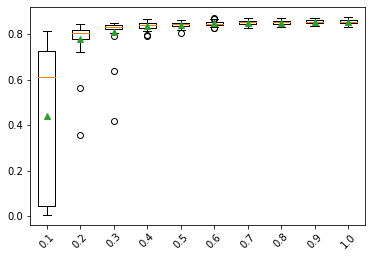

In [ ]:
# explore gradient boosting ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [ ]:

# explore gradient boosting number of features on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,21):
		models[str(i)] = GradientBoostingClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.855 (0.008)
>2 0.859 (0.009)
>3 0.858 (0.009)
>4 0.859 (0.009)
>5 0.857 (0.009)
>6 0.857 (0.010)
>7 0.856 (0.010)
>8 0.855 (0.009)
>9 0.855 (0.010)
>10 0.855 (0.010)
>11 0.854 (0.010)
>12 0.853 (0.009)
>13 0.853 (0.011)
>14 0.853 (0.009)
>15 0.853 (0.011)


ValueError: ignored

>0.0001 0.790 (0.011)
>0.0010 0.808 (0.011)
>0.0100 0.859 (0.009)
>0.1000 0.853 (0.011)
>1.0000 0.648 (0.271)


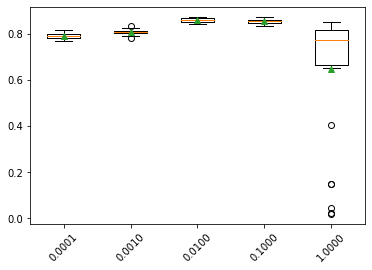

In [ ]:

# explore gradient boosting ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 

 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.861 (0.009)
>2 0.856 (0.008)
>3 0.853 (0.011)
>4 0.850 (0.010)
>5 0.848 (0.008)
>6 0.847 (0.009)
>7 0.847 (0.009)
>8 0.850 (0.010)
>9 0.850 (0.009)
>10 0.850 (0.009)


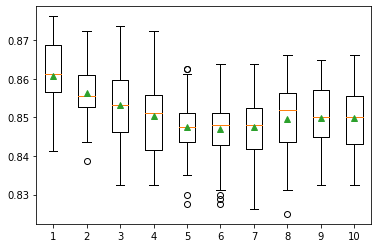

In [ ]:

# explore gradient boosting tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()